# Project 4: A/B-Testing

### Brief Project Description

Given data that contains the advertisement click rate for two products, we want to determine which product performs better. In order to achieve this goal, we use an A/B-Test.

The dataset that we are using throughout this project is a slightly changend version from an original file that can be found here: https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ab_testing/advertisement_clicks.csv

## Data Import and first Inspection

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

In [20]:
df = pd.read_excel('advertisment_clicks.xlsx')

In [21]:
df.head()

,Unnamed: 0,Unnamed: 1
0,advertisement_id,action
1,NaN,NaN
2,B,1
3,NaN,NaN
4,B,1


The dataframe has unnamed columns as well as a lot of NaN values. To fix it, we need to do a small amount of feature engineering.

## Feature Enigineering

In [22]:
df.dropna(inplace=True)

In [23]:
df = df.rename(columns={'Unnamed: 0': 'advertisement_id', 'Unnamed: 1': 'action'})

In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df.drop(index=[0],  inplace=True)

In [26]:
df

,advertisement_id,action
1,B,1
2,B,1
3,A,0
4,B,0
5,A,1
...,...,...
1996,A,0
1997,A,0
1998,A,0
1999,A,1


In [27]:
df['advertisement_id'].value_counts()

advertisement_id
B    1000
A    1000
Name: count, dtype: int64

In [28]:
df['action'].value_counts()

action
0    1324
1     676
Name: count, dtype: int64

## A/B Test

### Define the Variables we Refer To

To conduct the A/B-Test, we first define the variables we refer to. Those variables are advertisement_id variables 'A' and 'B'.

In [29]:
x1 = df[df['advertisement_id']=='A']['action'].to_numpy()
x2 = df[df['advertisement_id']=='B']['action'].to_numpy()

### Compare the Distribution of those Variables

Here, our goal is to compare the means of the distributions of both advertisement_id variables. In a first step, we plot out the distribution of advertisement_id A and B.

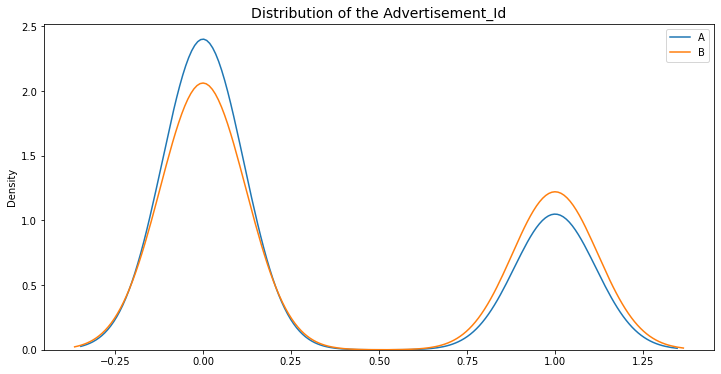

In [30]:
plt.figure(figsize=(12,6))
sns.kdeplot(x1, label='A')
sns.kdeplot(x2, label='B')
plt.title('Distribution of the Advertisement_Id', fontsize=14)
plt.legend();

The plot shows a distribution that resembles a normal distribution for both values that the advertisement_id variables take on. Additionally, we observe that variable A is more heavily concentrated around 0, whereas variable B is more strongly distributed around 1.

If we also compare there mean values, we can detect a slightly higher mean for advertisement_id B. 

In [31]:
x1.mean(), x2.mean()

(0.304, 0.372)

### Formulating the Hypothesis

That leads us to formulate the following assumption:  
* **Variable B has a higher mean than variable A.**

**To verify our assumption, we conduct an A/B-Test, as follows:**
   * **H_0 (Null hypothesis): x1_mean >= x2_mean**
   * **H_1 (Alternative Hypothesis): x1_mean < x2_mean**

### Conducting the A/B-Test 

In [33]:
alpha = 0.5

stat, p = ztest(x1, x2, value=0, alternative='smaller')

print('Statistics=%.5f, p=%.5f' % (stat, p))

if p > alpha:
    print('x1_mean >= x2_mean (fail to reject H0)')
else:
    print('x1_mean < x2_mean (reject H0)')

Statistics=-3.22117, p=0.00064
x1_mean < x2_mean (reject H0)


### Interpreting the Result

Since significance level is smaller than 0.05, the null hypotheis is rejected.

That means the __result__ 
 
* **x1_mean < x2_mean** 

is __statistically significant__. 

### Appendix: Explaining the Choice of Parameters in the Z-Test Function

How to explain the choice of parameters within the ztest function? The documentation of ztest states: In the two-sample case, the value parameter is the difference between the mean of x1 and the mean of x2 under the null hypothesis. Since we are assuming that the mean of x2 is greater than the mean of x1, it would yield a value parameter less than 0. We can specify a difference between the means that is less than zero using the alternative parameter. In this case, we are assigning the alternative parameter the value 'smaller'.

# References

https://www.udemy.com/course/bayesian-machine-learning-in-python-ab-testing

https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ab_testing/advertisement_clicks.csv